In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200623_Keck1_v1.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200623_Keck1

## Ca II IRT

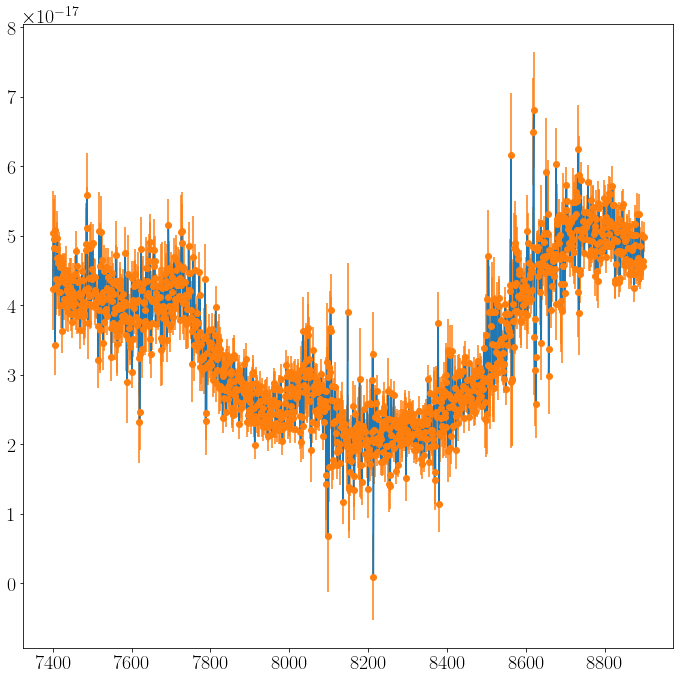

In [3]:
Spec1.plot_line_region(7400, 8900)

In [4]:
Spec1.add_line('CaII_IRT', 7600, 8750, lines=[8498.018, 8542.089, 8662.140])

987 points within 7600.00 and 8750.00 angstroms.


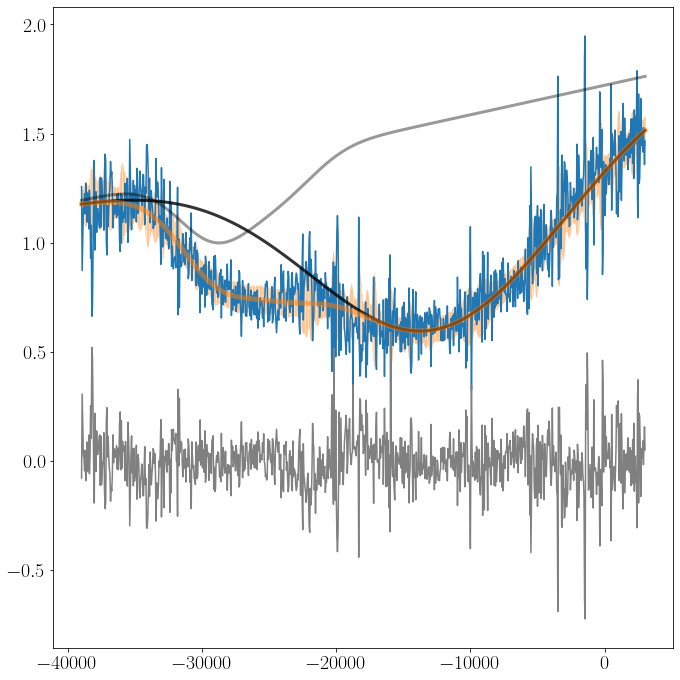

[ 1.76213258e+00  1.19371905e+00 -9.13120500e+03  1.82332028e+01
 -7.48173235e+03 -2.39848334e+04  1.57689490e+01 -1.05336274e+03]


In [5]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

100%|██████████| 1500/1500 [00:37<00:00, 39.52it/s]


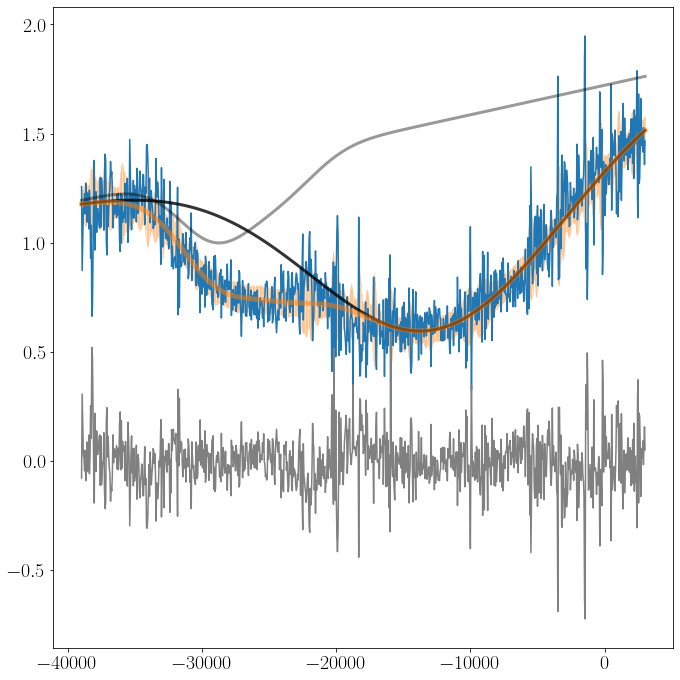

Velocity pvf: -9839 pm 119 km/s
Velocity hvf: -24245 pm 144 km/s


In [6]:
mu_pvf_prior = -11000
var_pvf_prior = 4e4
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              nburn=500)

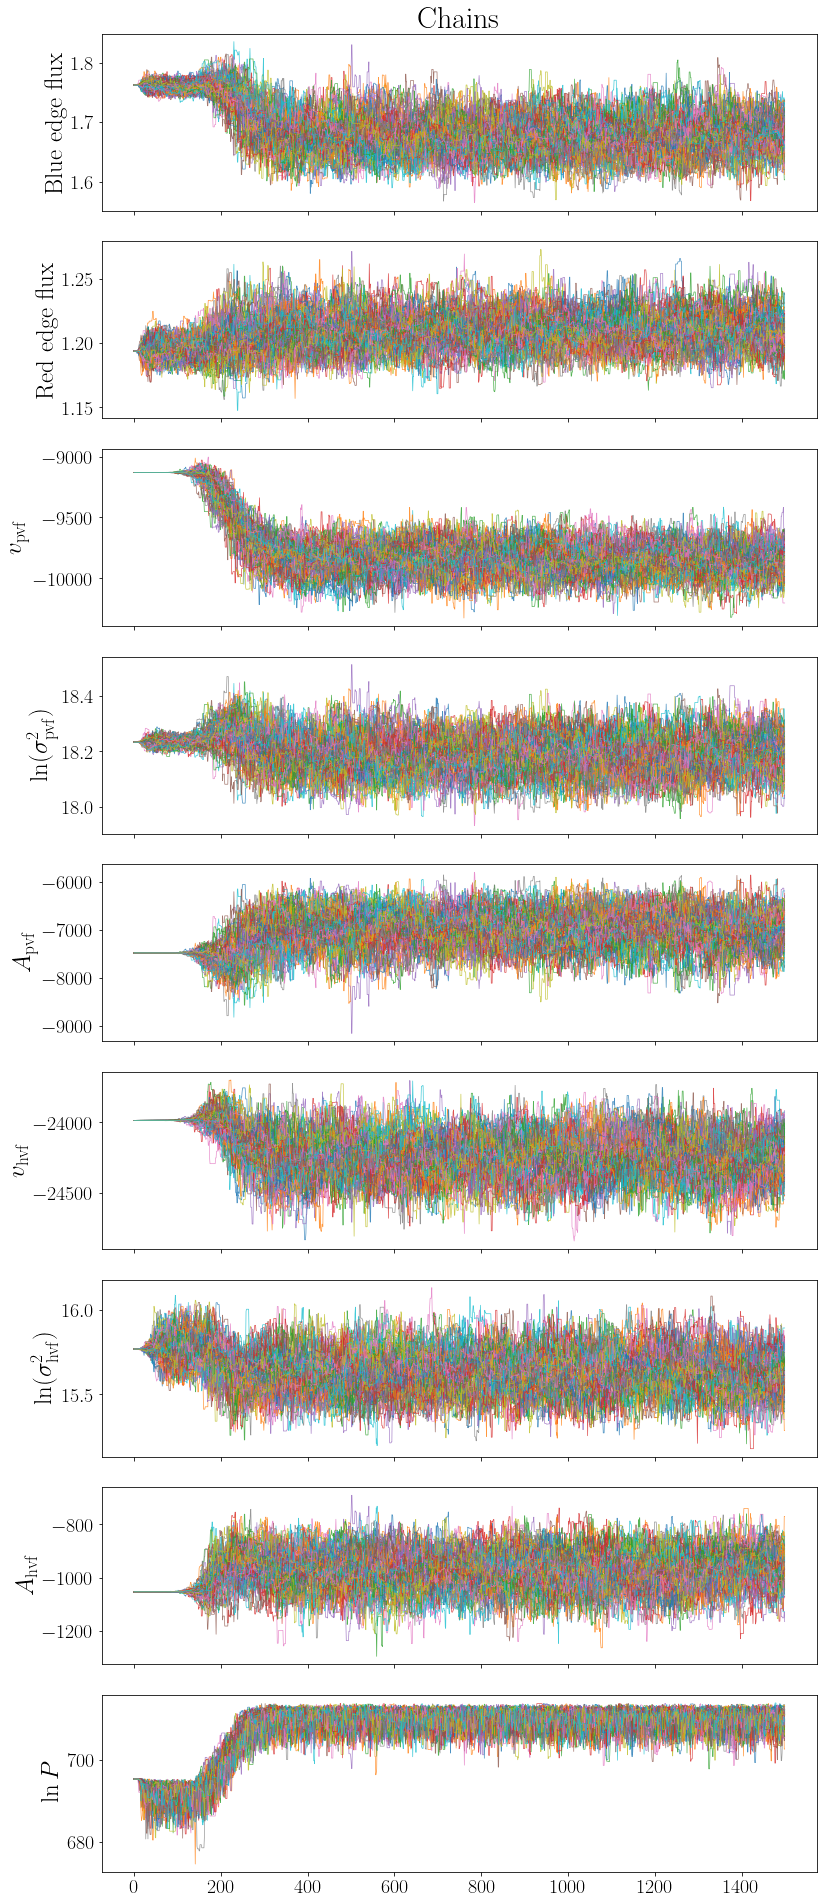

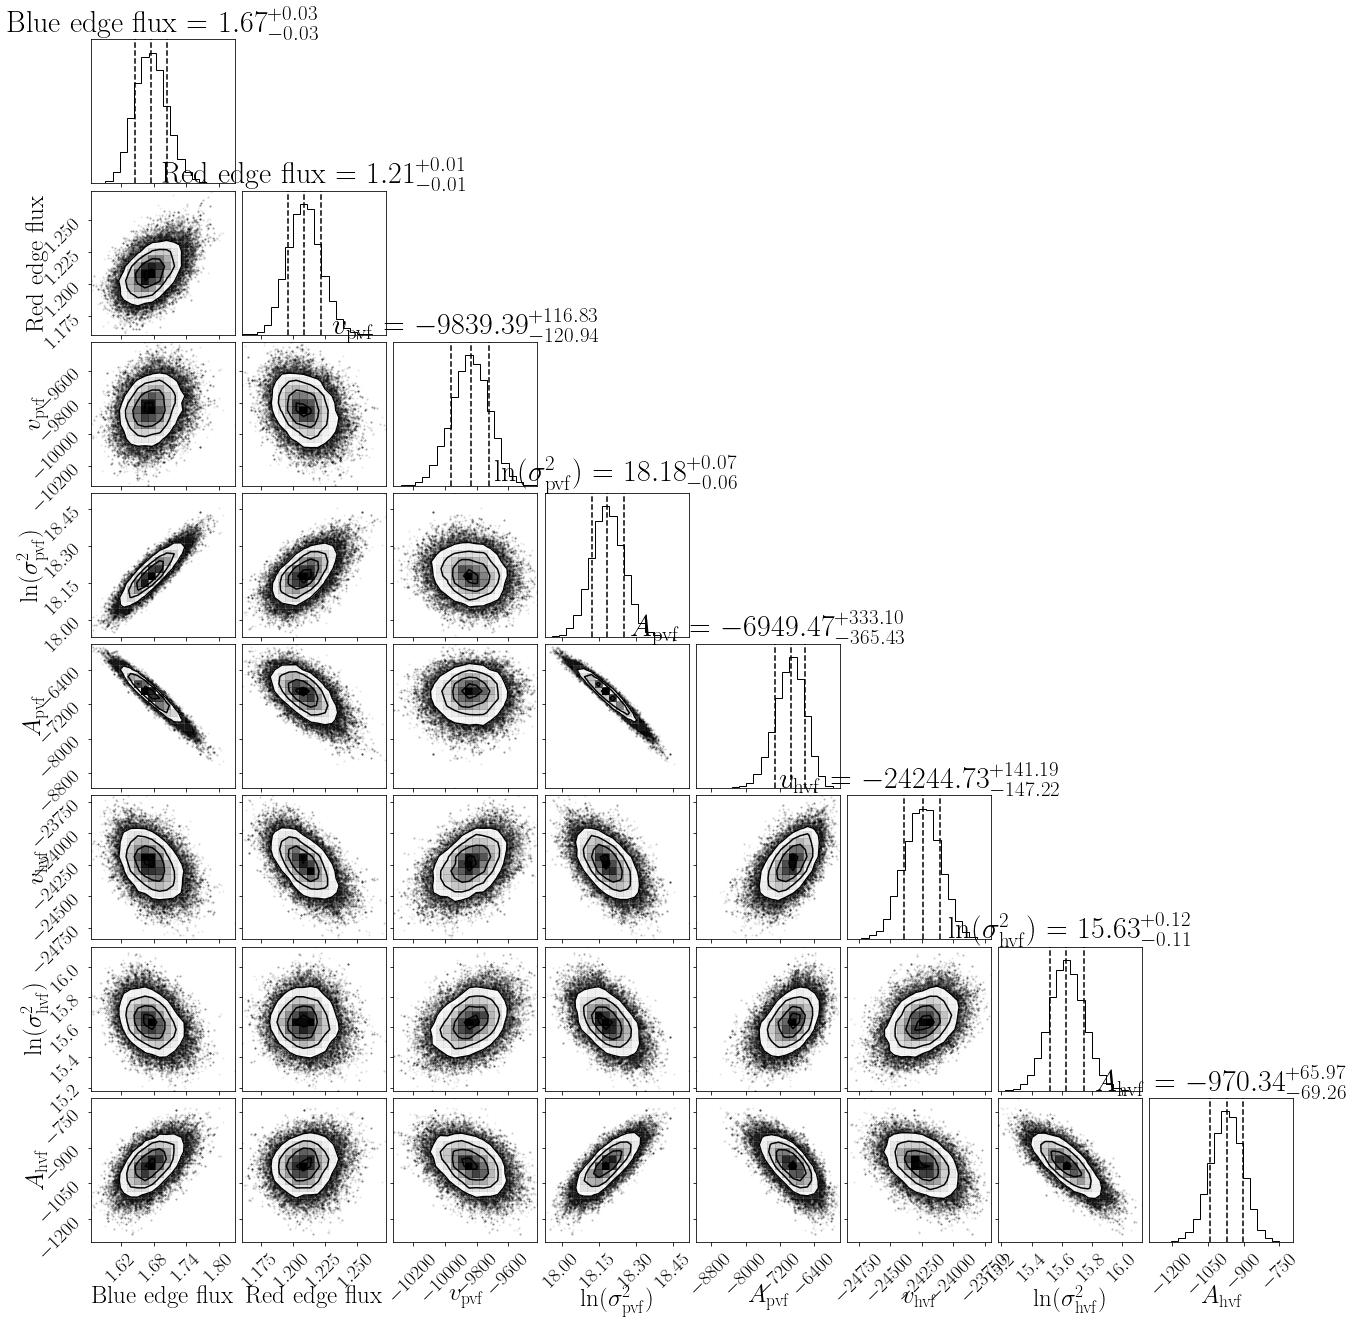

In [7]:
vel.plot_MCMC(sampler, 500)